# 1. Importación y normalización

## 1.1. Carga de los archivos

In [1]:
import pandas as pd
ventas = pd.read_csv("../data/ventas.csv")
productos = pd.read_csv("../data/productos.csv")
inventario = pd.read_csv("../data/inventario.csv")
costos = pd.read_csv("../data/Costos_Logisticos.csv")

## 1.2. Homogenización de nombre

In [2]:
for df in [ventas, productos, inventario, costos]:
    df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

## 1.3. Comprobación de la estructura

In [3]:
for name, df in [("ventas", ventas), ("productos", productos),
                 ("inventario", inventario), ("costos", costos)]:
    print(f"\n{name}: {df.shape} filas × {df.shape[1]} columnas")
    display(df.head(3))



ventas: (940550, 7) filas × 7 columnas


,fecha,tienda,sku,cantidad_vendida,precio_venta_unitario,descuento_aplicado,venta_neta
0,2023-01-01,TIENDA001,HM000088,1,28.24,0.2,22.592
1,2023-01-01,TIENDA001,HM000096,1,64.60,0.1,58.140
2,2023-01-01,TIENDA001,HM000100,2,28.23,0.2,45.168



productos: (100, 13) filas × 13 columnas


,sku,categoria,subcategoria,talla,color,costo_unitario,precio_venta,proveedor_id,lead_time_dias,cantidad_minima_pedido,multiplico_pedido,temporada,margen
0,HM000001,Vestidos,Temporada,XL,Negro,10.35,17.75,PROV001,18,50,10,Invierno,7.40
1,HM000002,Camisetas,Temporada,L,Rojo,34.60,40.98,PROV002,12,50,10,Verano,6.38
2,HM000003,Abrigos,Basico,L,Blanco,40.50,68.38,PROV003,12,100,25,Verano,27.88



inventario: (600, 6) filas × 6 columnas


,tienda,sku,stock_actual,stock_seguridad_actual,stock_en_transito,fecha_ultima_reposicion
0,TIENDA001,HM000084,18,16,16,2024-01-06
1,TIENDA001,HM000054,54,23,20,2023-12-30
2,TIENDA001,HM000071,62,17,26,2024-01-03



costos: (5, 7) filas × 7 columnas


,escenario,costo_pedido,costo_mantenimiento_anual,costo_almacenamiento_m2,costo_transferencia_tienda,costo_rotura_stock,costo_obsolescencia
0,Escenario 1,10.0,0.15,80.0,3.0,0.20,0.09
1,Escenario 2,40.0,0.20,100.0,4.0,0.25,0.12
2,Escenario 3,50.0,0.25,120.0,5.0,0.30,0.15


# 2.Validación de tipos y limpieza

In [4]:
ventas['fecha'] = pd.to_datetime(ventas['fecha'])
cols_num = ['cantidad_vendida','precio_venta_unitario','venta_neta']
ventas[cols_num] = ventas[cols_num].apply(pd.to_numeric, errors='coerce')
#Revisión nulos y duplicados
ventas.isna().sum(), ventas.duplicated().sum()

(fecha                    0
 tienda                   0
 sku                      0
 cantidad_vendida         0
 precio_venta_unitario    0
 descuento_aplicado       0
 venta_neta               0
 dtype: int64,
 206573)

# 3. Descripción estadística inicial

Descripción estadística de ventas:


,fecha,tienda,sku,cantidad_vendida,precio_venta_unitario,descuento_aplicado,venta_neta
count,940550,940550,940550,940550.000000,940550.000000,940550.000000,940550.000000
unique,NaN,10,100,NaN,NaN,NaN,NaN
top,NaN,TIENDA007,HM000014,NaN,NaN,NaN,NaN
freq,NaN,94835,9649,NaN,NaN,NaN,NaN
mean,2023-07-02 08:25:26.119823616,NaN,NaN,1.604478,62.407574,0.064818,93.382415
min,2023-01-01 00:00:00,NaN,NaN,1.000000,15.330000,0.000000,10.731000
25%,2023-04-02 00:00:00,NaN,NaN,1.000000,40.000000,0.000000,48.816000
50%,2023-07-02 00:00:00,NaN,NaN,1.000000,64.630000,0.000000,72.990000
75%,2023-10-01 00:00:00,NaN,NaN,2.000000,84.190000,0.100000,100.840000
max,2023-12-31 00:00:00,NaN,NaN,18.000000,98.970000,0.300000,1394.880000



Correlación precio vs cantidad:


,precio_venta_unitario,cantidad_vendida
precio_venta_unitario,1.000000,-0.010708
cantidad_vendida,-0.010708,1.000000


,precio_venta_unitario,cantidad_vendida
count,940550.000000,940550.000000
mean,62.407574,1.604478
std,24.311439,1.063199
min,15.330000,1.000000
median,64.630000,1.000000
max,98.970000,18.000000


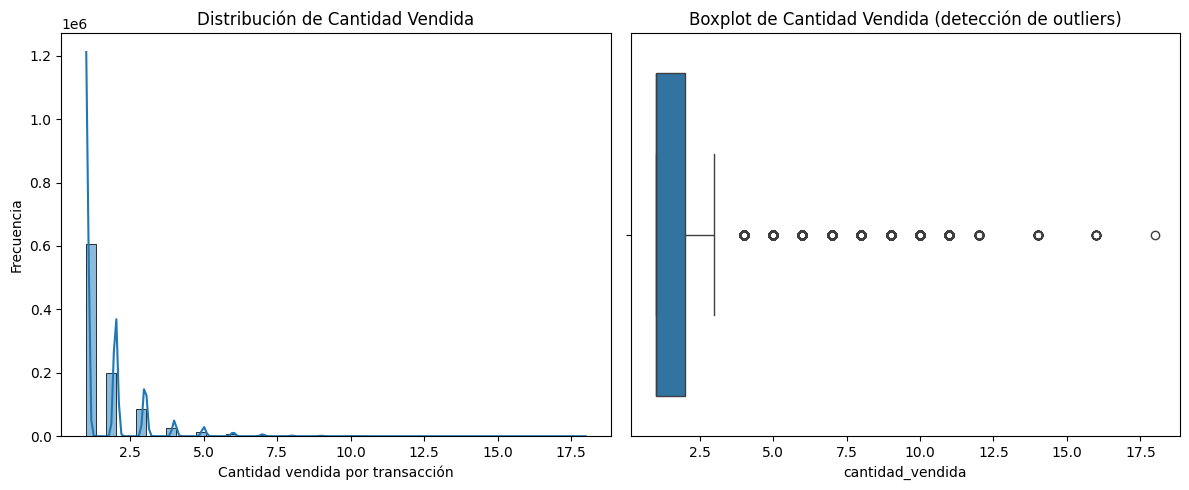

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descripción estadística
print("Descripción estadística de ventas:")
display(ventas.describe(include='all'))

# Correlación
print("\nCorrelación precio vs cantidad:")
display(ventas[['precio_venta_unitario','cantidad_vendida']].corr())

# Tabla de resumen concentrado
resumen = ventas[['precio_venta_unitario','cantidad_vendida']].agg(
    ['count','mean','std','min','median','max']
)
display(resumen)

# Histograma y distribución de ventas
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(ventas['cantidad_vendida'], bins=50, kde=True)
plt.title("Distribución de Cantidad Vendida")
plt.xlabel("Cantidad vendida por transacción")
plt.ylabel("Frecuencia")

# Boxplot para identificar outliers
plt.subplot(1,2,2)
sns.boxplot(x=ventas['cantidad_vendida'])
plt.title("Boxplot de Cantidad Vendida (detección de outliers)")
plt.tight_layout()
plt.show()

In [6]:
#Uniendo ventas con productos
ventas_cat = ventas.merge(productos[['sku','categoria']], on='sku', how='left')
ventas_cat.head()


,fecha,tienda,sku,cantidad_vendida,precio_venta_unitario,descuento_aplicado,venta_neta,categoria
0,2023-01-01,TIENDA001,HM000088,1,28.24,0.2,22.592,Camisetas
1,2023-01-01,TIENDA001,HM000096,1,64.60,0.1,58.140,Abrigos
2,2023-01-01,TIENDA001,HM000100,2,28.23,0.2,45.168,Accesorios
3,2023-01-01,TIENDA001,HM000088,6,28.24,0.0,169.440,Camisetas
4,2023-01-01,TIENDA001,HM000084,2,93.95,0.1,169.110,Accesorios


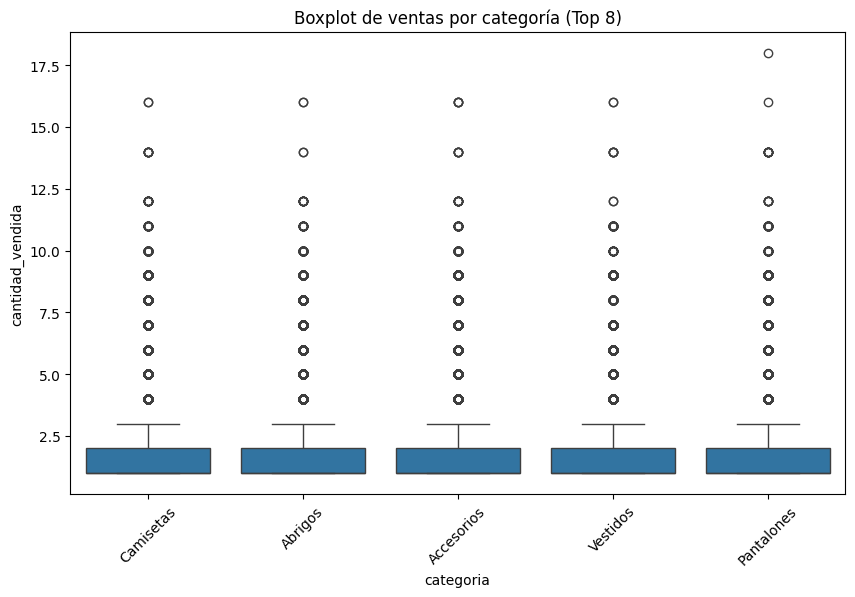

In [7]:
# Análisis de ventas por categoría (Top 8)
top_categorias = ventas_cat['categoria'].value_counts().nlargest(8).index
ventas_top = ventas_cat[ventas_cat['categoria'].isin(top_categorias)]

plt.figure(figsize=(10,6))
sns.boxplot(data=ventas_top, x='categoria', y='cantidad_vendida')
plt.xticks(rotation=45)
plt.title("Boxplot de ventas por categoría (Top 8)")
plt.show()

In [8]:
ventas_cat = ventas_cat.drop(columns=['tienda_x', 'tienda_y'], errors='ignore')

C:\Users\Usuario\AppData\Local\Temp\ipykernel_28028\2105102199.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=ventas_cat, x='tienda', y='cantidad_vendida', palette='Set2')


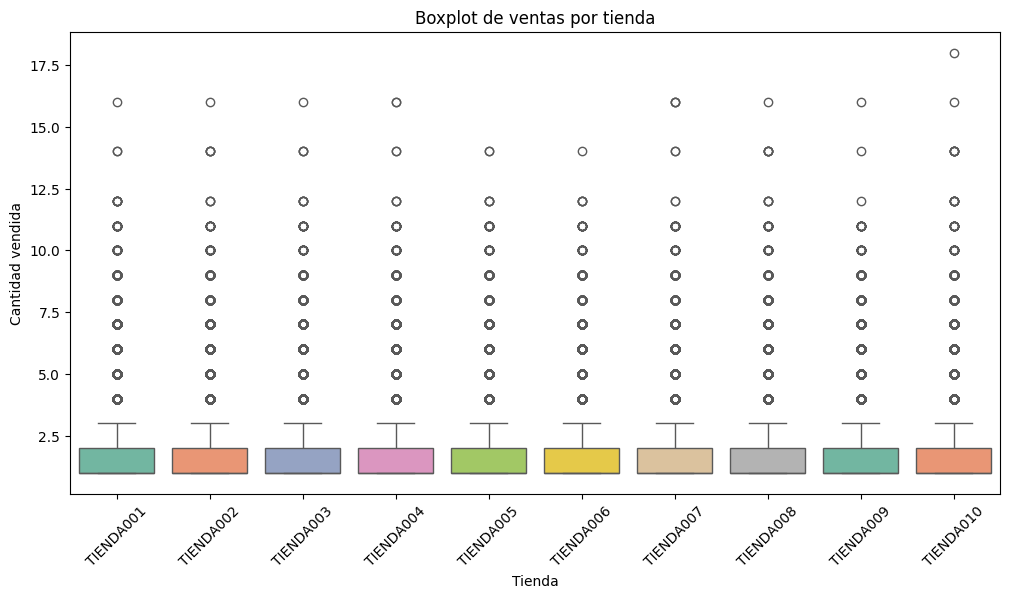

In [9]:
# Análisis de ventas por tienda
plt.figure(figsize=(12,6))
sns.boxplot(data=ventas_cat, x='tienda', y='cantidad_vendida', palette='Set2')
plt.xticks(rotation=45)
plt.title("Boxplot de ventas por tienda")
plt.xlabel("Tienda")
plt.ylabel("Cantidad vendida")
plt.show()

# 4. Análisis temporal de ventas (2023)

In [10]:
# Extraer componentes temporales
ventas_cat['año'] = ventas_cat['fecha'].dt.year
ventas_cat['mes'] = ventas_cat['fecha'].dt.month
ventas_cat['semana'] = ventas_cat['fecha'].dt.isocalendar().week.astype(int)

# Agrupar ventas totales por mes
ventas_mensuales = (
    ventas_cat.groupby(['año','mes'])
    .agg(total_vendido=('cantidad_vendida','sum'))
    .reset_index()
)

# Tabla resumen
resumen_temporal = (
    ventas_mensuales.groupby('año')
    .agg(
        venta_promedio_mensual=('total_vendido','mean'),
        desviacion_mensual=('total_vendido','std'),
        max_venta=('total_vendido','max'),
        min_venta=('total_vendido','min')
    )
    .reset_index()
)

display(resumen_temporal)

,año,venta_promedio_mensual,desviacion_mensual,max_venta,min_venta
0,2023,125757.666667,9252.175335,140341,115792


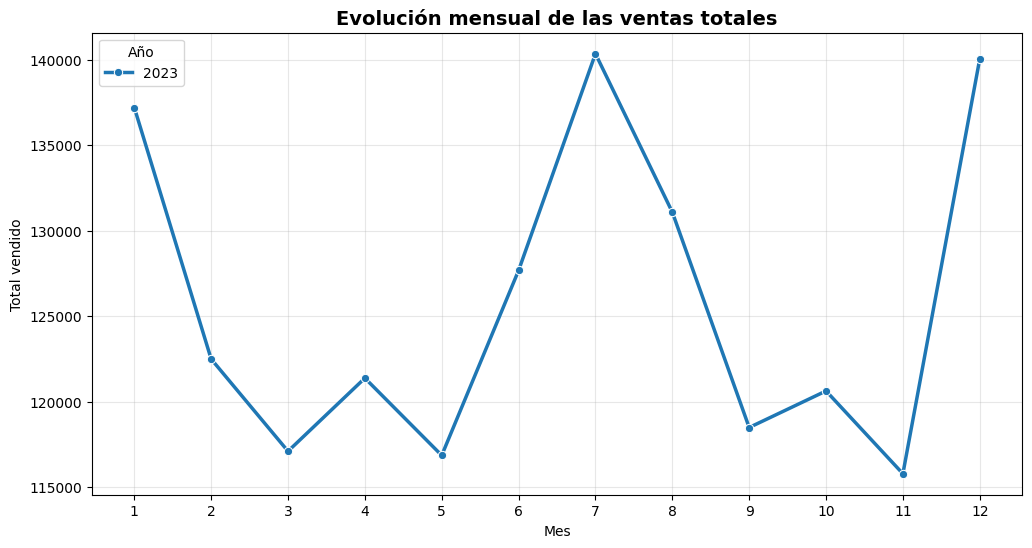

In [11]:
# ================================================================
# VISUALIZACIÓN TEMPORAL
# ================================================================

plt.figure(figsize=(12,6))
sns.lineplot(
    data=ventas_mensuales,
    x='mes', y='total_vendido', hue='año',
    marker='o', linewidth=2.5, palette='tab10'
)
plt.title("Evolución mensual de las ventas totales", fontsize=14, fontweight='bold')
plt.xlabel("Mes")
plt.ylabel("Total vendido")
plt.xticks(range(1,13))
plt.grid(alpha=0.3)
plt.legend(title='Año')
plt.show()

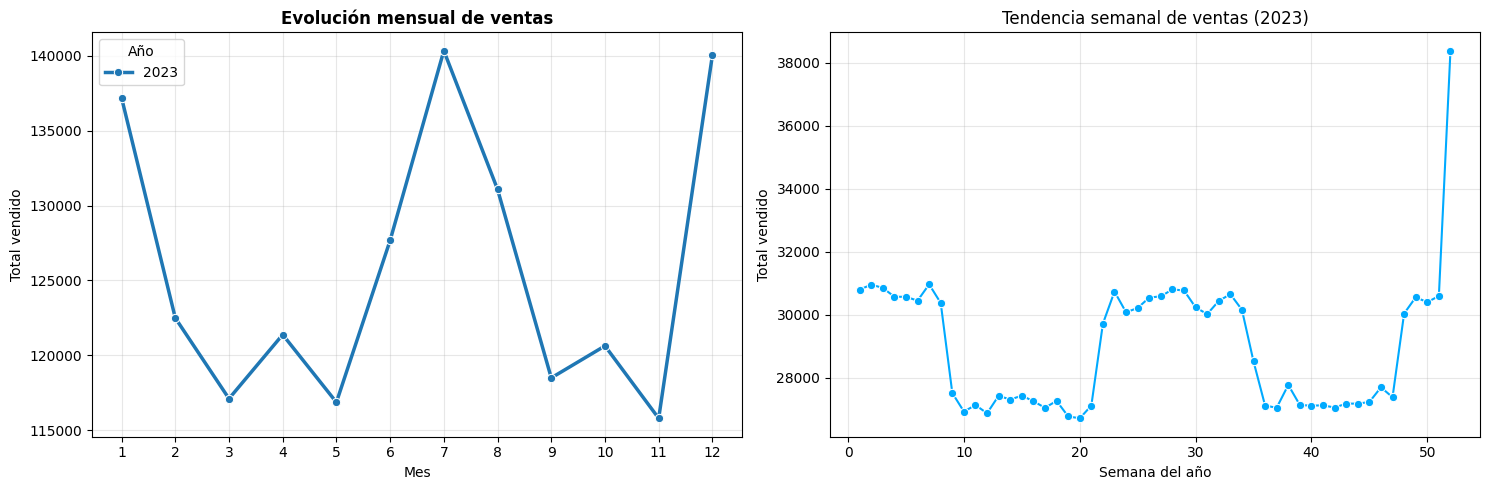

In [12]:
# Visualización temporal: Mensual y Semanal
ventas_semanal = (
    ventas_cat.groupby('semana')
    .agg(total_vendido=('cantidad_vendida','sum'))
    .reset_index()
    .sort_values('semana')
)

fig, axes = plt.subplots(1, 2, figsize=(15,5))

# Gráfico mensual
sns.lineplot(
    data=ventas_mensuales,
    x='mes', y='total_vendido', hue='año',
    marker='o', linewidth=2.5, palette='tab10', ax=axes[0]
)
axes[0].set_title("Evolución mensual de ventas", fontweight='bold')
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Total vendido")
axes[0].set_xticks(range(1,13))
axes[0].grid(alpha=0.3)
axes[0].legend(title='Año')

# Gráfico semanal
sns.lineplot(
    data=ventas_semanal,
    x='semana', y='total_vendido',
    marker='o', color='#00aaff', ax=axes[1]
)
axes[1].set_title("Tendencia semanal de ventas (2023)")
axes[1].set_xlabel("Semana del año")
axes[1].set_ylabel("Total vendido")
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 5. Integración con inventario y productos

In [13]:
# Verificar columnas disponibles en cada dataset
print("Columnas en productos:")
print(productos.columns.tolist())
print("\nColumnas en inventario:")
print(inventario.columns.tolist())

Columnas en productos:
['sku', 'categoria', 'subcategoria', 'talla', 'color', 'costo_unitario', 'precio_venta', 'proveedor_id', 'lead_time_dias', 'cantidad_minima_pedido', 'multiplico_pedido', 'temporada', 'margen']

Columnas en inventario:
['tienda', 'sku', 'stock_actual', 'stock_seguridad_actual', 'stock_en_transito', 'fecha_ultima_reposicion']


In [14]:
# Verificar primero qué columnas están disponibles en inventario
print("Columnas disponibles en inventario:", inventario.columns.tolist())

# Seleccionar solo las columnas que existen
cols_inventario = ['sku', 'tienda']
for col in ['lead_time_dias', 'lead_time', 'stock_actual', 'stock_seguridad_actual', 
            'stock_seguridad', 'stock_en_transito', 'stock_transito']:
    if col in inventario.columns:
        cols_inventario.append(col)

print(f"\nColumnas seleccionadas de inventario: {cols_inventario}")

# Integración completa: ventas + productos + inventario
ventas_total = ventas_cat.merge(
    productos[['sku', 'subcategoria', 'costo_unitario', 'precio_venta', 'margen']],
    on='sku',
    how='left'
).merge(
    inventario[cols_inventario],
    on=['sku', 'tienda'],
    how='left'
)

# Renombrar columnas si tienen nombres diferentes
if 'lead_time' in ventas_total.columns and 'lead_time_dias' not in ventas_total.columns:
    ventas_total = ventas_total.rename(columns={'lead_time': 'lead_time_dias'})
if 'stock_seguridad' in ventas_total.columns and 'stock_seguridad_actual' not in ventas_total.columns:
    ventas_total = ventas_total.rename(columns={'stock_seguridad': 'stock_seguridad_actual'})
if 'stock_transito' in ventas_total.columns and 'stock_en_transito' not in ventas_total.columns:
    ventas_total = ventas_total.rename(columns={'stock_transito': 'stock_en_transito'})

# Si lead_time_dias no existe, crear un valor por defecto de 7 días
if 'lead_time_dias' not in ventas_total.columns:
    print(" Columna 'lead_time_dias' no encontrada, usando valor por defecto de 7 días")
    ventas_total['lead_time_dias'] = 7

# Limpiar columnas duplicadas de tienda si existen
ventas_total = ventas_total.drop(columns=['tienda_x', 'tienda_y'], errors='ignore')

# Eliminar duplicados
ventas_total = ventas_total.drop_duplicates(subset=['fecha', 'sku', 'tienda'])

# Calcular métricas integradas por SKU-Tienda
metricas_venta = (
    ventas_total.groupby(['sku', 'categoria', 'subcategoria', 'tienda'])
    .agg(
        demanda_promedio=('cantidad_vendida', 'mean'),
        desviacion_demanda=('cantidad_vendida', 'std'),
        ventas_totales=('cantidad_vendida', 'sum'),
        precio_promedio=('precio_venta_unitario', 'mean'),
        costo_unitario=('costo_unitario', 'mean'),
        precio_venta=('precio_venta', 'mean'),
        lead_time=('lead_time_dias', 'mean'),
        stock_actual=('stock_actual', 'mean'),
        stock_seguridad=('stock_seguridad_actual', 'mean'),
        stock_en_transito=('stock_en_transito', 'mean'),
        margen_promedio=('margen', 'mean')
    )
    .reset_index()
)

# Exportar dataset final consolidado
metricas_venta.to_csv("metricas_venta_integradas.csv", index=False)

print("\n Métricas integradas generadas correctamente")
print(f" Total de combinaciones SKU-Tienda: {len(metricas_venta)}")
display(metricas_venta.head(10))

Columnas disponibles en inventario: ['tienda', 'sku', 'stock_actual', 'stock_seguridad_actual', 'stock_en_transito', 'fecha_ultima_reposicion']

Columnas seleccionadas de inventario: ['sku', 'tienda', 'stock_actual', 'stock_seguridad_actual', 'stock_en_transito']
 Columna 'lead_time_dias' no encontrada, usando valor por defecto de 7 días
 Columna 'lead_time_dias' no encontrada, usando valor por defecto de 7 días

 Métricas integradas generadas correctamente
 Total de combinaciones SKU-Tienda: 1000

 Métricas integradas generadas correctamente
 Total de combinaciones SKU-Tienda: 1000


,sku,categoria,subcategoria,tienda,demanda_promedio,desviacion_demanda,ventas_totales,precio_promedio,costo_unitario,precio_venta,lead_time,stock_actual,stock_seguridad,stock_en_transito,margen_promedio
0,HM000001,Vestidos,Temporada,TIENDA001,1.673780,1.165370,549,37.05,10.35,17.75,7.0,68.0,15.0,22.0,7.4
1,HM000001,Vestidos,Temporada,TIENDA002,1.625378,1.132906,538,37.05,10.35,17.75,7.0,12.0,17.0,39.0,7.4
2,HM000001,Vestidos,Temporada,TIENDA003,1.674923,1.049796,541,37.05,10.35,17.75,7.0,1.0,24.0,0.0,7.4
3,HM000001,Vestidos,Temporada,TIENDA004,1.660550,1.084358,543,37.05,10.35,17.75,7.0,70.0,24.0,0.0,7.4
4,HM000001,Vestidos,Temporada,TIENDA005,1.575301,0.966380,523,37.05,10.35,17.75,7.0,17.0,17.0,44.0,7.4
5,HM000001,Vestidos,Temporada,TIENDA006,1.710769,1.240784,556,37.05,10.35,17.75,7.0,56.0,21.0,25.0,7.4
6,HM000001,Vestidos,Temporada,TIENDA007,1.736364,1.148626,573,37.05,10.35,17.75,7.0,NaN,NaN,NaN,7.4
7,HM000001,Vestidos,Temporada,TIENDA008,1.650602,1.033385,548,37.05,10.35,17.75,7.0,NaN,NaN,NaN,7.4
8,HM000001,Vestidos,Temporada,TIENDA009,1.604230,0.989573,531,37.05,10.35,17.75,7.0,NaN,NaN,NaN,7.4
9,HM000001,Vestidos,Temporada,TIENDA010,1.680851,1.136277,553,37.05,10.35,17.75,7.0,NaN,NaN,NaN,7.4


# 6. Análisis de los escenarios logísticos

In [15]:
import numpy as np
import pandas as pd

# Verificar estructura
print("Columnas disponibles en costos:\n", costos.columns.tolist())

# Parámetro para el nivel de servicio (puede adaptarse según política)
nivel_servicio_dict = {
    'Escenario 1': 0.90,
    'Escenario 2': 0.93,
    'Escenario 3': 0.95,
    'Escenario 4': 0.97,
    'Escenario 5': 0.99
}

resultados = []

for _, row in costos.iterrows():
    escenario = row['escenario']
    S = row['costo_pedido']
    h = row['costo_mantenimiento_anual']
    c_alm = row['costo_almacenamiento_m2']
    c_transf = row['costo_transferencia_tienda']
    c_rotura = row['costo_rotura_stock']
    c_obs = row['costo_obsolescencia']
    Z = 1.65  # equivalente a 95% de nivel de servicio

    print(f"\n Procesando {escenario} | S={S} | h={h}")

    df = metricas_venta.copy()

    # ===============================
    # PARTE 1: Parámetros básicos
    # ===============================
    df['D'] = df['demanda_promedio'] * 52  # semanal -> anual
    df['H'] = h * df['costo_unitario']

    # ===============================
    # PARTE 2: Modelo (s, Q)
    # ===============================
    df['Q_opt'] = np.sqrt((2 * df['D'] * S) / df['H'])
    df['D_L'] = df['demanda_promedio'] * df['lead_time']
    df['sigma_L'] = df['desviacion_demanda'] * np.sqrt(df['lead_time'])
    df['s_reorder'] = df['D_L'] + Z * df['sigma_L']

    # ===============================
    # PARTE 3: Costos extendidos
    # ===============================
    df['CTA_basico'] = (df['D'] / df['Q_opt']) * S + (df['Q_opt'] / 2) * df['H']
    df['CTA_almacen'] = c_alm * (df['stock_actual'] / 100)
    df['CTA_transf'] = c_transf * np.random.uniform(0.5, 1.5, len(df))  # estimación relativa
    df['CTA_rotura'] = c_rotura * np.maximum(0, df['s_reorder'] - df['stock_actual'])
    df['CTA_obs'] = c_obs * np.maximum(0, df['stock_actual'] - df['s_reorder'])

    # Costo total extendido
    df['CTA_total'] = df['CTA_basico'] + df['CTA_almacen'] + df['CTA_transf'] + df['CTA_rotura'] + df['CTA_obs']

    df['escenario'] = escenario
    resultados.append(df)

# Consolidar escenarios
df_escenarios = pd.concat(resultados, ignore_index=True)

# ===============================
# PARTE 4: Resumen comparativo
# ===============================
resumen = (
    df_escenarios.groupby('escenario')
    .agg(
        Q_medio=('Q_opt', 'mean'),
        s_medio=('s_reorder', 'mean'),
        CTA_promedio=('CTA_total', 'mean'),
        CTA_total=('CTA_total', 'sum')
    )
    .reset_index()
)

display(resumen.head(10))


Columnas disponibles en costos:
 ['escenario', 'costo_pedido', 'costo_mantenimiento_anual', 'costo_almacenamiento_m2', 'costo_transferencia_tienda', 'costo_rotura_stock', 'costo_obsolescencia']

 Procesando Escenario 1 | S=10.0 | h=0.15

 Procesando Escenario 2 | S=40.0 | h=0.2

 Procesando Escenario 3 | S=50.0 | h=0.25

 Procesando Escenario 4 | S=55.0 | h=0.3

 Procesando Escenario 5 | S=60.0 | h=0.35


,escenario,Q_medio,s_medio,CTA_promedio,CTA_total
0,Escenario 1,21.608094,15.525764,127.848241,76708.944719
1,Escenario 2,37.426317,15.525764,247.800832,148680.499379
2,Escenario 3,37.426317,15.525764,307.212934,184327.760554
3,Escenario 4,35.832970,15.525764,349.903683,209942.209601
4,Escenario 5,34.650037,15.525764,391.387694,234832.616367
